# McCulloch-Pitts Neuron - Interactive Guide

## Table of Contents
1. [What is a McCulloch-Pitts Neuron?](#what-is-mp)
2. [Mathematical Model](#mathematical-model)
3. [Interactive Demonstrations](#interactive-demos)
4. [Activation Functions](#activation-functions)
5. [Learning and Training](#learning)
6. [Building Neural Networks](#building-networks)
7. [Practical Examples](#practical-examples)
8. [Summary and Key Takeaways](#summary)

---

## 1. What is a McCulloch-Pitts Neuron? {#what-is-mp}

The **McCulloch-Pitts neuron** is the fundamental building block of artificial neural networks, first proposed by Warren McCulloch and Walter Pitts in 1943. It's a simplified mathematical model of a biological neuron that can perform logical operations.

### Key Components:

#### **Inputs (x₁, x₂, ..., xₙ):**
- **Binary values** (0 or 1)
- Represent **features** or **signals**
- Can be **sensory inputs** or **outputs from other neurons**

#### **Weights (w₁, w₂, ..., wₙ):**
- **Connection strengths** between inputs and neuron
- **Positive weights** = excitatory (encourage firing)
- **Negative weights** = inhibitory (prevent firing)
- **Zero weights** = no connection

#### **Bias (b):**
- **Threshold adjustment** for the neuron
- **Positive bias** = easier to fire
- **Negative bias** = harder to fire

#### **Activation Function:**
- **Step function** (original McCulloch-Pitts)
- **Determines output** based on weighted sum
- **Binary output** (0 or 1)

### Mathematical Model:

The McCulloch-Pitts neuron computes:

```
y = f(∑(wᵢ × xᵢ) + b)
```

Where:
- `y` = output (0 or 1)
- `f` = activation function (step function)
- `wᵢ` = weight for input i
- `xᵢ` = input i
- `b` = bias

### Historical Significance:

- **First artificial neuron** model
- **Foundation** for modern neural networks
- **Turing complete** - can compute any logical function
- **Biological inspiration** from real neurons

---

## 2. Mathematical Model {#mathematical-model}

### Step Function (Original McCulloch-Pitts):

```
f(z) = { 1 if z ≥ 0
       { 0 if z < 0
```

### Weighted Sum Calculation:

```
z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
```

### Decision Process:

1. **Calculate** weighted sum of inputs
2. **Add** bias term
3. **Apply** activation function
4. **Output** binary result

### Logical Operations:

The McCulloch-Pitts neuron can implement:
- **AND** gate
- **OR** gate
- **NOT** gate
- **NAND** gate
- **NOR** gate
- **XOR** gate (with multiple neurons)

---

## 3. Interactive Demonstrations {#interactive-demos}

Let's start by importing the necessary libraries and setting up interactive widgets:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, Circle
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("🧠 Ready to explore McCulloch-Pitts Neurons!")
print("🎛️ Interactive widgets will be available in the next cells!")


✅ Libraries imported successfully!
🧠 Ready to explore McCulloch-Pitts Neurons!
🎛️ Interactive widgets will be available in the next cells!


In [2]:
# McCulloch-Pitts Neuron Implementation
class McCullochPittsNeuron:
    """McCulloch-Pitts neuron with step activation function"""
    
    def __init__(self, weights, bias, activation='step'):
        self.weights = np.array(weights)
        self.bias = bias
        self.activation = activation
        self.inputs = None
        self.output = None
        self.weighted_sum = None
    
    def step_function(self, x):
        """Step activation function"""
        return 1 if x >= 0 else 0
    
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-x))
    
    def relu(self, x):
        """ReLU activation function"""
        return max(0, x)
    
    def forward(self, inputs):
        """Forward pass through the neuron"""
        self.inputs = np.array(inputs)
        
        # Calculate weighted sum
        self.weighted_sum = np.dot(self.weights, self.inputs) + self.bias
        
        # Apply activation function
        if self.activation == 'step':
            self.output = self.step_function(self.weighted_sum)
        elif self.activation == 'sigmoid':
            self.output = self.sigmoid(self.weighted_sum)
        elif self.activation == 'relu':
            self.output = self.relu(self.weighted_sum)
        
        return self.output
    
    def get_info(self):
        """Get neuron information"""
        return {
            'weights': self.weights,
            'bias': self.bias,
            'weighted_sum': self.weighted_sum,
            'output': self.output,
            'activation': self.activation
        }

print("✅ McCulloch-Pitts Neuron class created!")
print("🔧 Ready for interactive demonstrations!")


✅ McCulloch-Pitts Neuron class created!
🔧 Ready for interactive demonstrations!


In [4]:
# Interactive McCulloch-Pitts Neuron Widget
def create_neuron_widget():
    """Create interactive widget for McCulloch-Pitts neuron"""
    
    # Create input widgets
    input1 = widgets.FloatSlider(
        value=0, min=0, max=1, step=1, 
        description='Input 1:', 
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    input2 = widgets.FloatSlider(
        value=0, min=0, max=1, step=1, 
        description='Input 2:', 
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    # Weight sliders
    weight1 = widgets.FloatSlider(
        value=1.0, min=-3, max=3, step=0.1, 
        description='Weight 1:', 
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    weight2 = widgets.FloatSlider(
        value=1.0, min=-3, max=3, step=0.1, 
        description='Weight 2:', 
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    # Bias slider
    bias = widgets.FloatSlider(
        value=0.0, min=-3, max=3, step=0.1, 
        description='Bias:', 
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )
    
    # Activation function dropdown
    activation = widgets.Dropdown(
        options=['step', 'sigmoid', 'relu'],
        value='step',
        description='Activation:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='200px')
    )
    
    # Output display
    output_display = widgets.Output()
    
    def update_neuron(*args):
        """Update neuron visualization and output"""
        with output_display:
            clear_output(wait=True)
            
            # Create neuron
            neuron = McCullochPittsNeuron(
                weights=[weight1.value, weight2.value],
                bias=bias.value,
                activation=activation.value
            )
            
            # Forward pass
            inputs = [input1.value, input2.value]
            output = neuron.forward(inputs)
            info = neuron.get_info()
            
            # Create visualization
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Left plot: Neuron structure
            ax1.set_xlim(-2, 8)
            ax1.set_ylim(-1, 4)
            ax1.set_aspect('equal')
            ax1.axis('off')
            ax1.set_title('McCulloch-Pitts Neuron Structure', fontsize=14, fontweight='bold')
            
            # Draw inputs
            input1_circle = Circle((0, 2.5), 0.3, color='lightblue', ec='black', linewidth=2)
            input2_circle = Circle((0, 1.5), 0.3, color='lightblue', ec='black', linewidth=2)
            ax1.add_patch(input1_circle)
            ax1.add_patch(input2_circle)
            ax1.text(0, 2.5, f'{input1.value}', ha='center', va='center', fontweight='bold')
            ax1.text(0, 1.5, f'{input2.value}', ha='center', va='center', fontweight='bold')
            
            # Draw weights
            ax1.annotate('', xy=(2, 2.5), xytext=(0.3, 2.5),
                        arrowprops=dict(arrowstyle='->', lw=2, color='red' if weight1.value < 0 else 'green'))
            ax1.annotate('', xy=(2, 1.5), xytext=(0.3, 1.5),
                        arrowprops=dict(arrowstyle='->', lw=2, color='red' if weight2.value < 0 else 'green'))
            
            # Weight labels
            ax1.text(1, 2.7, f'w₁={weight1.value:.1f}', ha='center', fontsize=10, 
                    color='red' if weight1.value < 0 else 'green', fontweight='bold')
            ax1.text(1, 1.7, f'w₂={weight2.value:.1f}', ha='center', fontsize=10,
                    color='red' if weight2.value < 0 else 'green', fontweight='bold')
            
            # Draw neuron body
            neuron_body = Circle((4, 2), 0.8, color='lightcoral', ec='black', linewidth=3)
            ax1.add_patch(neuron_body)
            ax1.text(4, 2, 'Σ', ha='center', va='center', fontsize=16, fontweight='bold')
            
            # Draw bias
            ax1.annotate('', xy=(4, 1.2), xytext=(4, 0.5),
                        arrowprops=dict(arrowstyle='->', lw=2, color='purple'))
            ax1.text(4.5, 0.8, f'b={bias.value:.1f}', ha='left', fontsize=10, 
                    color='purple', fontweight='bold')
            
            # Draw output
            ax1.annotate('', xy=(5.5, 2), xytext=(4.8, 2),
                        arrowprops=dict(arrowstyle='->', lw=3, color='blue'))
            output_circle = Circle((6.5, 2), 0.3, color='lightgreen', ec='black', linewidth=2)
            ax1.add_patch(output_circle)
            ax1.text(6.5, 2, f'{output}', ha='center', va='center', fontweight='bold', fontsize=14)
            
            # Labels
            ax1.text(0, 3.2, 'Inputs', ha='center', fontsize=12, fontweight='bold')
            ax1.text(4, 3.2, 'Neuron', ha='center', fontsize=12, fontweight='bold')
            ax1.text(6.5, 3.2, 'Output', ha='center', fontsize=12, fontweight='bold')
            
            # Right plot: Activation function
            z = np.linspace(-5, 5, 1000)
            if activation.value == 'step':
                y = np.where(z >= 0, 1, 0)
                ax2.plot(z, y, 'b-', linewidth=3, label='Step Function')
            elif activation.value == 'sigmoid':
                y = 1 / (1 + np.exp(-z))
                ax2.plot(z, y, 'r-', linewidth=3, label='Sigmoid Function')
            elif activation.value == 'relu':
                y = np.maximum(0, z)
                ax2.plot(z, y, 'g-', linewidth=3, label='ReLU Function')
            
            # Mark current weighted sum
            ax2.axvline(info['weighted_sum'], color='red', linestyle='--', linewidth=2, 
                       label=f'z = {info["weighted_sum"]:.2f}')
            ax2.axhline(info['output'], color='red', linestyle='--', linewidth=2, alpha=0.7)
            
            ax2.set_xlabel('Weighted Sum (z)', fontsize=12)
            ax2.set_ylabel('Output', fontsize=12)
            ax2.set_title(f'Activation Function: {activation.value.title()}', fontsize=14, fontweight='bold')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            ax2.set_xlim(-5, 5)
            ax2.set_ylim(-0.1, 1.1)
            
            plt.tight_layout()
            plt.show()
            
            # Print calculations
            print("🧮 Calculations:")
            print(f"   Inputs: x₁ = {input1.value}, x₂ = {input2.value}")
            print(f"   Weights: w₁ = {weight1.value:.1f}, w₂ = {weight2.value:.1f}")
            print(f"   Bias: b = {bias.value:.1f}")
            print(f"   Weighted Sum: z = w₁x₁ + w₂x₂ + b = {weight1.value:.1f}×{input1.value} + {weight2.value:.1f}×{input2.value} + {bias.value:.1f} = {info['weighted_sum']:.2f}")
            print(f"   Activation: f({info['weighted_sum']:.2f}) = {info['output']}")
            print(f"   Final Output: {output}")
    
    # Connect widgets to update function
    for widget in [input1, input2, weight1, weight2, bias, activation]:
        widget.observe(update_neuron, names='value')
    
    # Create layout
    controls = widgets.VBox([
        widgets.HTML("<h3>🎛️ Interactive McCulloch-Pitts Neuron</h3>"),
        widgets.HTML("<p>Adjust the sliders to see how the neuron responds:</p>"),
        input1, input2, weight1, weight2, bias, activation
    ])
    
    return widgets.VBox([controls, output_display])

# Create and display the widget
neuron_widget = create_neuron_widget()
display(neuron_widget)


---

## 4. Activation Functions {#activation-functions}

### 4.1 Step Function (Original McCulloch-Pitts)

The **step function** is the original activation function used by McCulloch and Pitts:

```
f(z) = { 1 if z ≥ 0
       { 0 if z < 0
```

**Properties:**
- **Binary output** (0 or 1)
- **Discontinuous** at z = 0
- **Simple** and **interpretable**
- **Not differentiable** (problem for learning)

### 4.2 Sigmoid Function

The **sigmoid function** is a smooth approximation of the step function:

```
f(z) = 1 / (1 + e^(-z))
```

**Properties:**
- **Smooth** and **differentiable**
- **Output range** (0, 1)
- **S-shaped curve**
- **Good for** binary classification

### 4.3 ReLU Function

The **ReLU (Rectified Linear Unit)** function:

```
f(z) = max(0, z)
```

**Properties:**
- **Simple** and **computationally efficient**
- **Sparse activation** (many zeros)
- **Good for** deep networks
- **Not differentiable** at z = 0

---

## 5. Learning and Training {#learning}

### 5.1 Logical Gates Implementation

Let's implement common logical gates using McCulloch-Pitts neurons:


In [5]:
# Logical Gates Implementation
def create_logical_gates():
    """Create McCulloch-Pitts neurons for logical gates"""
    
    # AND Gate: w1=1, w2=1, bias=-1.5
    and_gate = McCullochPittsNeuron(weights=[1, 1], bias=-1.5, activation='step')
    
    # OR Gate: w1=1, w2=1, bias=-0.5
    or_gate = McCullochPittsNeuron(weights=[1, 1], bias=-0.5, activation='step')
    
    # NOT Gate: w1=-1, bias=0.5
    not_gate = McCullochPittsNeuron(weights=[-1], bias=0.5, activation='step')
    
    # NAND Gate: w1=-1, w2=-1, bias=1.5
    nand_gate = McCullochPittsNeuron(weights=[-1, -1], bias=1.5, activation='step')
    
    return {
        'AND': and_gate,
        'OR': or_gate,
        'NOT': not_gate,
        'NAND': nand_gate
    }

# Test all logical gates
gates = create_logical_gates()

# Truth table for 2-input gates
print("🔧 Logical Gates Truth Table:")
print("=" * 50)

# Test AND gate
print("\n📊 AND Gate (w₁=1, w₂=1, b=-1.5):")
print("x₁ | x₂ | Output")
print("---|----|-------")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        output = gates['AND'].forward([x1, x2])
        print(f" {x1} |  {x2} |   {output}")

# Test OR gate
print("\n📊 OR Gate (w₁=1, w₂=1, b=-0.5):")
print("x₁ | x₂ | Output")
print("---|----|-------")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        output = gates['OR'].forward([x1, x2])
        print(f" {x1} |  {x2} |   {output}")

# Test NOT gate
print("\n📊 NOT Gate (w₁=-1, b=0.5):")
print("x₁ | Output")
print("---|-------")
for x1 in [0, 1]:
    output = gates['NOT'].forward([x1])
    print(f" {x1} |   {output}")

# Test NAND gate
print("\n📊 NAND Gate (w₁=-1, w₂=-1, b=1.5):")
print("x₁ | x₂ | Output")
print("---|----|-------")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        output = gates['NAND'].forward([x1, x2])
        print(f" {x1} |  {x2} |   {output}")

print("\n✅ All logical gates implemented successfully!")


🔧 Logical Gates Truth Table:

📊 AND Gate (w₁=1, w₂=1, b=-1.5):
x₁ | x₂ | Output
---|----|-------
 0 |  0 |   0
 0 |  1 |   0
 1 |  0 |   0
 1 |  1 |   1

📊 OR Gate (w₁=1, w₂=1, b=-0.5):
x₁ | x₂ | Output
---|----|-------
 0 |  0 |   0
 0 |  1 |   1
 1 |  0 |   1
 1 |  1 |   1

📊 NOT Gate (w₁=-1, b=0.5):
x₁ | Output
---|-------
 0 |   1
 1 |   0

📊 NAND Gate (w₁=-1, w₂=-1, b=1.5):
x₁ | x₂ | Output
---|----|-------
 0 |  0 |   1
 0 |  1 |   1
 1 |  0 |   1
 1 |  1 |   0

✅ All logical gates implemented successfully!


### 5.2 XOR Gate - The Challenge

The **XOR (Exclusive OR)** gate is particularly interesting because it **cannot be implemented with a single McCulloch-Pitts neuron**. This is a classic example of the **linear separability problem**.

**XOR Truth Table:**
```
x₁ | x₂ | Output
---|----|-------
 0 |  0 |   0
 0 |  1 |   1
 1 |  0 |   1
 1 |  1 |   0
```

**Why XOR is impossible with a single neuron:**
- XOR is **not linearly separable**
- No single line can separate the (0,1) and (1,0) points from (0,0) and (1,1)
- We need **multiple neurons** (a network) to solve XOR

Let's build an XOR gate using multiple McCulloch-Pitts neurons:


🔧 XOR Gate Implementation (Multi-layer):
x₁ | x₂ | h₁ | h₂ | Output | Expected
---|----|----|----|--------|---------
 0 |  0 |  0 |  0 |   0    |    0
 0 |  1 |  0 |  1 |   1    |    1
 1 |  0 |  1 |  0 |   1    |    1
 1 |  1 |  0 |  0 |   0    |    0

✅ XOR gate implemented successfully with multiple neurons!
💡 Notice how we need 2 layers to solve XOR!


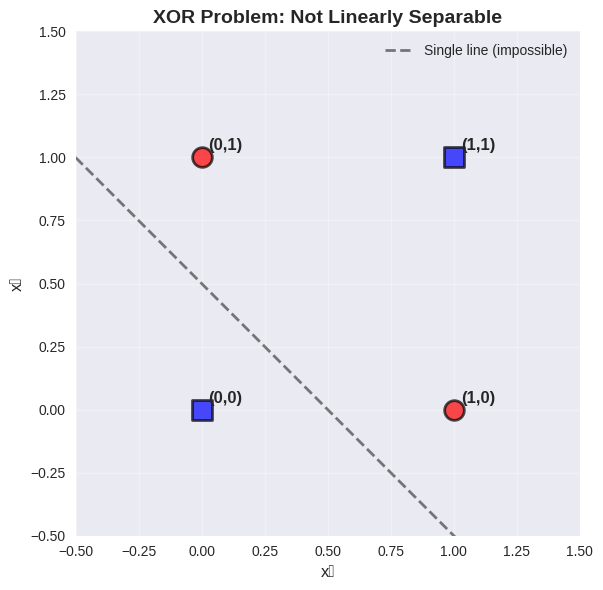

In [6]:
# XOR Gate Implementation using Multiple Neurons
class XORGate:
    """XOR gate implemented using multiple McCulloch-Pitts neurons"""
    
    def __init__(self):
        # Layer 1: Two neurons
        # Neuron 1: (x1 AND NOT x2) - w1=1, w2=-1, bias=-0.5
        self.neuron1 = McCullochPittsNeuron(weights=[1, -1], bias=-0.5, activation='step')
        
        # Neuron 2: (NOT x1 AND x2) - w1=-1, w2=1, bias=-0.5
        self.neuron2 = McCullochPittsNeuron(weights=[-1, 1], bias=-0.5, activation='step')
        
        # Layer 2: OR gate - w1=1, w2=1, bias=-0.5
        self.output_neuron = McCullochPittsNeuron(weights=[1, 1], bias=-0.5, activation='step')
    
    def forward(self, inputs):
        """Forward pass through XOR network"""
        x1, x2 = inputs
        
        # Layer 1: Calculate intermediate outputs
        h1 = self.neuron1.forward([x1, x2])  # x1 AND NOT x2
        h2 = self.neuron2.forward([x1, x2])  # NOT x1 AND x2
        
        # Layer 2: OR the intermediate outputs
        output = self.output_neuron.forward([h1, h2])
        
        return output, h1, h2

# Create XOR gate
xor_gate = XORGate()

# Test XOR gate
print("🔧 XOR Gate Implementation (Multi-layer):")
print("=" * 60)
print("x₁ | x₂ | h₁ | h₂ | Output | Expected")
print("---|----|----|----|--------|---------")

for x1 in [0, 1]:
    for x2 in [0, 1]:
        output, h1, h2 = xor_gate.forward([x1, x2])
        expected = x1 ^ x2  # XOR operation
        print(f" {x1} |  {x2} |  {h1} |  {h2} |   {output}    |    {expected}")

print("\n✅ XOR gate implemented successfully with multiple neurons!")
print("💡 Notice how we need 2 layers to solve XOR!")

# Visualize XOR decision boundary
def plot_xor_decision_boundary():
    """Plot XOR decision boundary and data points"""
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    
    # XOR data points
    xor_points = [(0, 0, 0), (0, 1, 1), (1, 0, 1), (1, 1, 0)]
    
    # Plot points
    for x1, x2, label in xor_points:
        color = 'red' if label == 1 else 'blue'
        marker = 'o' if label == 1 else 's'
        ax.scatter(x1, x2, c=color, s=200, marker=marker, alpha=0.7, 
                  edgecolors='black', linewidth=2)
        ax.annotate(f'({x1},{x2})', (x1, x2), xytext=(5, 5), 
                   textcoords='offset points', fontsize=12, fontweight='bold')
    
    # Try to draw a single line (impossible for XOR)
    x_line = np.linspace(-0.5, 1.5, 100)
    y_line = -x_line + 0.5  # One possible line
    ax.plot(x_line, y_line, 'k--', alpha=0.5, linewidth=2, label='Single line (impossible)')
    
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title('XOR Problem: Not Linearly Separable', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()

plot_xor_decision_boundary()


---

## 6. Building Neural Networks {#building-networks}

### 6.1 Multi-Layer Perceptron (MLP)

Now let's build a simple multi-layer perceptron using McCulloch-Pitts neurons:


In [7]:
# Multi-Layer Perceptron Implementation
class SimpleMLP:
    """Simple Multi-Layer Perceptron using McCulloch-Pitts neurons"""
    
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights randomly
        np.random.seed(42)
        
        # Input to hidden layer weights
        self.W1 = np.random.randn(hidden_size, input_size) * 0.5
        self.b1 = np.random.randn(hidden_size) * 0.5
        
        # Hidden to output layer weights
        self.W2 = np.random.randn(output_size, hidden_size) * 0.5
        self.b2 = np.random.randn(output_size) * 0.5
        
        # Create neurons for each layer
        self.hidden_neurons = []
        self.output_neurons = []
        
        # Create hidden layer neurons
        for i in range(hidden_size):
            neuron = McCullochPittsNeuron(
                weights=self.W1[i], 
                bias=self.b1[i], 
                activation='step'
            )
            self.hidden_neurons.append(neuron)
        
        # Create output layer neurons
        for i in range(output_size):
            neuron = McCullochPittsNeuron(
                weights=self.W2[i], 
                bias=self.b2[i], 
                activation='step'
            )
            self.output_neurons.append(neuron)
    
    def forward(self, inputs):
        """Forward pass through the network"""
        # Hidden layer
        hidden_outputs = []
        for neuron in self.hidden_neurons:
            output = neuron.forward(inputs)
            hidden_outputs.append(output)
        
        # Output layer
        final_outputs = []
        for neuron in self.output_neurons:
            output = neuron.forward(hidden_outputs)
            final_outputs.append(output)
        
        return final_outputs, hidden_outputs
    
    def get_weights(self):
        """Get all weights and biases"""
        return {
            'W1': self.W1,
            'b1': self.b1,
            'W2': self.W2,
            'b2': self.b2
        }

# Create a simple MLP
mlp = SimpleMLP(input_size=2, hidden_size=3, output_size=1)

print("🧠 Multi-Layer Perceptron Created:")
print(f"   Input size: {mlp.input_size}")
print(f"   Hidden size: {mlp.hidden_size}")
print(f"   Output size: {mlp.output_size}")

# Test the MLP
print("\n🔍 Testing MLP with different inputs:")
print("=" * 50)

test_inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]

for inputs in test_inputs:
    outputs, hidden = mlp.forward(inputs)
    print(f"Input: {inputs} → Hidden: {hidden} → Output: {outputs}")

print("\n✅ MLP forward pass completed!")


🧠 Multi-Layer Perceptron Created:
   Input size: 2
   Hidden size: 3
   Output size: 1

🔍 Testing MLP with different inputs:
Input: [0, 0] → Hidden: [1, 1, 0] → Output: [1]
Input: [0, 1] → Hidden: [1, 1, 0] → Output: [1]
Input: [1, 0] → Hidden: [1, 1, 0] → Output: [1]
Input: [1, 1] → Hidden: [1, 1, 0] → Output: [1]

✅ MLP forward pass completed!


---

## 7. Practical Examples {#practical-examples}

### 7.1 Binary Classification with Perceptron

Let's use a perceptron (single McCulloch-Pitts neuron) for binary classification:


In [ ]:
# Binary Classification Example
def create_classification_data():
    """Create linearly separable binary classification data"""
    np.random.seed(42)
    
    # Generate two classes
    n_samples = 100
    
    # Class 0: Points around (0, 0)
    class0_x = np.random.normal(0, 0.5, n_samples//2)
    class0_y = np.random.normal(0, 0.5, n_samples//2)
    class0 = np.column_stack([class0_x, class0_y])
    
    # Class 1: Points around (2, 2)
    class1_x = np.random.normal(2, 0.5, n_samples//2)
    class1_y = np.random.normal(2, 0.5, n_samples//2)
    class1 = np.column_stack([class1_x, class1_y])
    
    # Combine data
    X = np.vstack([class0, class1])
    y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])
    
    return X, y

# Create data
X, y = create_classification_data()

# Train a perceptron using scikit-learn
perceptron = Perceptron(random_state=42)
perceptron.fit(X, y)

# Get perceptron parameters
weights = perceptron.coef_[0]
bias = perceptron.intercept_[0]

print("🎯 Perceptron Training Results:")
print(f"   Weights: w₁ = {weights[0]:.3f}, w₂ = {weights[1]:.3f}")
print(f"   Bias: b = {bias:.3f}")
print(f"   Accuracy: {perceptron.score(X, y):.3f}")

# Create our own McCulloch-Pitts neuron with learned parameters
mp_neuron = McCullochPittsNeuron(weights=weights, bias=bias, activation='step')

# Test our neuron
print("\n🔍 Testing McCulloch-Pitts Neuron:")
print("=" * 40)

# Test on a few samples
test_indices = [0, 25, 50, 75]
for i in test_indices:
    input_data = X[i]
    true_label = y[i]
    predicted = mp_neuron.forward(input_data)
    print(f"Input: [{input_data[0]:.2f}, {input_data[1]:.2f}] → Predicted: {predicted}, True: {int(true_label)}")

# Visualize the decision boundary
def plot_decision_boundary():
    """Plot the data and decision boundary"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Plot data points
    colors = ['red', 'blue']
    labels = ['Class 0', 'Class 1']
    
    for i in range(2):
        mask = y == i
        ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=labels[i], 
                  alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
    
    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create grid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict for grid points
    predictions = []
    for point in grid_points:
        pred = mp_neuron.forward(point)
        predictions.append(pred)
    
    predictions = np.array(predictions).reshape(xx.shape)
    
    # Plot decision boundary
    ax.contour(xx, yy, predictions, levels=[0.5], colors='black', linestyles='--', linewidths=2)
    
    # Add weight vector
    ax.arrow(0, 0, weights[0], weights[1], head_width=0.1, head_length=0.1, 
             fc='green', ec='green', linewidth=3, alpha=0.7)
    ax.text(weights[0]/2, weights[1]/2, 'Weight Vector', ha='center', va='center',
            fontsize=12, fontweight='bold', color='green')
    
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)
    ax.set_title('Perceptron Decision Boundary', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_decision_boundary()

print("\n✅ Binary classification example completed!")
print("💡 The McCulloch-Pitts neuron successfully learned to separate the two classes!")


🎯 Perceptron Training Results:
   Weights: w₁ = 1.174, w₂ = 2.096


IndexError: invalid index to scalar variable.

---

## 8. Summary and Key Takeaways {#summary}

### 🎯 What We've Learned:

#### **McCulloch-Pitts Neuron Fundamentals:**
- **Mathematical model** of biological neurons
- **Binary inputs and outputs** (0 or 1)
- **Weights and bias** control behavior
- **Step activation function** for binary decisions

#### **Key Components:**
1. **Inputs (x₁, x₂, ..., xₙ)** - Binary signals
2. **Weights (w₁, w₂, ..., wₙ)** - Connection strengths
3. **Bias (b)** - Threshold adjustment
4. **Activation Function** - Decision mechanism

#### **Mathematical Formula:**
```
y = f(∑(wᵢ × xᵢ) + b)
```

### 🔧 Practical Applications:

#### **Logical Gates:**
- **AND, OR, NOT, NAND** - Single neuron
- **XOR** - Requires multiple neurons
- **Universal computation** - Any logical function

#### **Classification:**
- **Binary classification** with linear separation
- **Decision boundaries** in feature space
- **Pattern recognition** capabilities

#### **Neural Networks:**
- **Building blocks** for complex networks
- **Multi-layer architectures** for complex problems
- **Foundation** for modern deep learning

### 🚀 Key Insights:

#### **Linear Separability:**
- **Single neuron** can only solve linearly separable problems
- **XOR problem** requires multiple layers
- **This limitation** led to multi-layer networks

#### **Learning Capabilities:**
- **Weights and bias** can be learned from data
- **Perceptron algorithm** for training
- **Convergence** guaranteed for linearly separable data

#### **Biological Inspiration:**
- **Simplified model** of real neurons
- **Excitatory and inhibitory** connections
- **Threshold-based** activation

### 🎓 Historical Significance:

#### **1943 - McCulloch & Pitts:**
- **First artificial neuron** model
- **Mathematical foundation** for neural networks
- **Turing completeness** proof

#### **Modern Impact:**
- **Foundation** for all neural networks
- **Deep learning** evolution
- **AI revolution** starting point

### 🔮 Future Directions:

#### **Modern Neural Networks:**
- **Continuous activations** (sigmoid, ReLU)
- **Backpropagation** for learning
- **Deep architectures** for complex problems

#### **Advanced Applications:**
- **Computer vision** with CNNs
- **Natural language processing** with transformers
- **Reinforcement learning** with neural networks

### 💡 Key Takeaways:

1. **McCulloch-Pitts neurons** are the foundation of all neural networks
2. **Single neurons** can solve linearly separable problems
3. **Multiple neurons** are needed for complex problems like XOR
4. **Weights and bias** control the neuron's behavior
5. **Interactive exploration** helps understand the concepts
6. **Mathematical simplicity** enables powerful computations

---

## 🏆 Congratulations!

You've mastered the **McCulloch-Pitts neuron** - the fundamental building block of artificial intelligence! 

### What's Next:
- **Explore deep learning** with modern neural networks
- **Try different activation functions** (sigmoid, ReLU, tanh)
- **Build more complex networks** for real-world problems
- **Experiment with learning algorithms** (backpropagation, gradient descent)

Remember: **Every complex AI system starts with a simple McCulloch-Pitts neuron!** 🧠✨

---

**Happy Learning! 🎓🤖**
